In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
from math import sqrt

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}


In [3]:
sales = pd.read_csv("~/Desktop/ML_Washington/WashingtonML/Regression/Week6/kc_house_data_small.csv", dtype = dtype_dict)

In [5]:
train = pd.read_csv("~/Desktop/ML_Washington/WashingtonML/Regression/Week6/kc_house_data_small_train.csv", dtype = dtype_dict)
test = pd.read_csv("~/Desktop/ML_Washington/WashingtonML/Regression/Week6/kc_house_data_small_test.csv", dtype = dtype_dict)
validation = pd.read_csv("~/Desktop/ML_Washington/WashingtonML/Regression/Week6/kc_house_data_validation.csv", dtype = dtype_dict)

In [6]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [7]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

# Extract features and normalize

Using all of the numerical inputs listed in `feature_list`, transform the training, test, and validation SFrames into Numpy arrays:

In [8]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

In computing distances, it is crucial to normalize features. Otherwise, for example, the `sqft_living` feature (typically on the order of thousands) would exert a much larger influence on distance than the `bedrooms` feature (typically on the order of ones). We divide each column of the training feature matrix by its 2-norm, so that the transformed column has unit norm.

IMPORTANT: Make sure to store the norms of the features in the training set. The features in the test and validation sets must be divided by these same norms, so that the training, test, and validation sets are normalized consistently.

In [9]:
def normalize_features(features):
    norms = np.linalg.norm(features, axis =0)
    normalized_features = features/norms
    return (normalized_features, norms)

In [10]:
features_train, norms = normalize_features(features_train) # normalize training set features (columns)
features_test = features_test / norms # normalize test set by training set norms
features_valid = features_valid / norms # normalize validation set by training set norms

# Compute multiple distances

Of course, to do nearest neighbor regression, we need to compute the distance between our query house and *all* houses in the training set.  

To visualize this nearest-neighbor search, let's first compute the distance from our query house (`features_test[0]`) to the first 10 houses of the training set (`features_train[0:10]`) and then search for the nearest neighbor within this small set of houses.  Through restricting ourselves to a small set of houses to begin with, we can visually scan the list of 10 distances to verify that our code for finding the nearest neighbor is working.

Write a loop to compute the Euclidean distance from the query house to each of the first 10 houses in the training set.

In [13]:
features_train.shape

(5527, 18)

In [19]:
features_train[]

array([ 0.01345102,  0.00775643,  0.00602491,  0.00459184,  0.00321036,
        0.0085295 ,  0.        ,  0.        ,  0.0116321 ,  0.01042901,
        0.00529699,  0.        ,  0.0131892 ,  0.        ,  0.01350096,
       -0.01345359,  0.0174884 ,  0.00327015])

In [16]:
features_test[0]

array([ 0.01345102,  0.01551285,  0.01807473,  0.01759212,  0.00160518,
        0.017059  ,  0.        ,  0.05102365,  0.0116321 ,  0.01564352,
        0.01362084,  0.02481682,  0.01350306,  0.        ,  0.01345387,
       -0.01346922,  0.01375926,  0.0016225 ])

In [217]:
distance_test_0 = []
for i in range(10):
    diff = features_train[i] - features_test[0]
    sqr_diff = sum(val**2 for val in diff)
    distance = sqrt(sqr_diff)
    distance_test_0.append(distance)
    print("The distance for house {} is {}".format(i,distance))

The distance for house 0 is 0.06027470916295592
The distance for house 1 is 0.08546881147643746
The distance for house 2 is 0.06149946435279315
The distance for house 3 is 0.05340273979294363
The distance for house 4 is 0.05844484060170442
The distance for house 5 is 0.059879215098128345
The distance for house 6 is 0.05463140496775461
The distance for house 7 is 0.05543108323614607
The distance for house 8 is 0.052383627840220305
The distance for house 9 is 0.05972359371398078


In [218]:
min(distance_test_0)

0.052383627840220305

In [216]:
print(round(0.05972,3))

0.06


*** QUIZ QUESTION ***

Among the first 10 training houses, which house is the closest to the query house?

It is computationally inefficient to loop over computing distances to all houses in our training dataset. Fortunately, many of the Numpy functions can be **vectorized**, applying the same operation over multiple values or vectors.  We now walk through this process.

Consider the following loop that computes the element-wise difference between the features of the query house (`features_test[0]`) and the first 3 training houses (`features_train[0:3]`):

In [24]:
for i in range(3):
    print (features_train[i]-features_test[0])
    # should print 3 vectors of length 18

[ 0.00000000e+00 -3.87821276e-03 -1.20498190e-02 -1.05552733e-02
  2.08673616e-04 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
  0.00000000e+00 -3.47633726e-03 -5.50336860e-03 -2.48168183e-02
 -1.63756198e-04  0.00000000e+00 -1.70254220e-05  1.29876855e-05
 -5.14364795e-03  6.69281453e-04]
[ 0.00000000e+00 -3.87821276e-03 -4.51868214e-03 -2.26610387e-03
  7.19763456e-04  0.00000000e+00  0.00000000e+00 -5.10236549e-02
  0.00000000e+00 -3.47633726e-03  1.30705004e-03 -1.45830788e-02
 -1.91048898e-04  6.65082271e-02  4.23090220e-05  6.16364736e-06
 -2.89330197e-03  1.47606982e-03]
[ 0.00000000e+00 -7.75642553e-03 -1.20498190e-02 -1.30002801e-02
  1.60518166e-03 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
  0.00000000e+00 -5.21450589e-03 -8.32384500e-03 -2.48168183e-02
 -3.13866046e-04  0.00000000e+00  4.70885840e-05  1.56292487e-05
  3.72914476e-03  1.64764925e-03]


In [25]:
print(features_train[0:3] - features_test[0])

[[ 0.00000000e+00 -3.87821276e-03 -1.20498190e-02 -1.05552733e-02
   2.08673616e-04 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
   0.00000000e+00 -3.47633726e-03 -5.50336860e-03 -2.48168183e-02
  -1.63756198e-04  0.00000000e+00 -1.70254220e-05  1.29876855e-05
  -5.14364795e-03  6.69281453e-04]
 [ 0.00000000e+00 -3.87821276e-03 -4.51868214e-03 -2.26610387e-03
   7.19763456e-04  0.00000000e+00  0.00000000e+00 -5.10236549e-02
   0.00000000e+00 -3.47633726e-03  1.30705004e-03 -1.45830788e-02
  -1.91048898e-04  6.65082271e-02  4.23090220e-05  6.16364736e-06
  -2.89330197e-03  1.47606982e-03]
 [ 0.00000000e+00 -7.75642553e-03 -1.20498190e-02 -1.30002801e-02
   1.60518166e-03 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
   0.00000000e+00 -5.21450589e-03 -8.32384500e-03 -2.48168183e-02
  -3.13866046e-04  0.00000000e+00  4.70885840e-05  1.56292487e-05
   3.72914476e-03  1.64764925e-03]]


In [27]:
# verify that vectorization works
results = features_train[0:3] - features_test[0]
print (results[0] - (features_train[0]-features_test[0]))
# should print all 0's if results[0] == (features_train[0]-features_test[0])
print (results[1] - (features_train[1]-features_test[0]))
# should print all 0's if results[1] == (features_train[1]-features_test[0])
print (results[2] - (features_train[2]-features_test[0]))
# should print all 0's if results[2] == (features_train[2]-features_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Perform 1-nearest neighbor regression

Now that we have the element-wise differences, it is not too hard to compute the Euclidean distances between our query house and all of the training houses. First, write a single-line expression to define a variable `diff` such that `diff[i]` gives the element-wise difference between the features of the query house and the `i`-th training house.

In [67]:
def euclidean_distance(feature_matrix,query_vector):
    diff = feature_matrix-query_vector
    distance = np.sqrt(np.sum(diff**2, axis=1))
    return distance

In [68]:
diff = features_train - features_test[0]
print (np.sum(diff**2, axis=1)[15]) # take sum of squares across each row, and print the 16th sum
print (np.sum(diff[15]**2)) # print the sum of squares for the 16th row -- should be same as above

0.0033070590284564457
0.0033070590284564453


In [69]:
distance = euclidean_distance(features_train ,features_test[0])

In [71]:
distance[100]

0.023708232416678195

*** QUIZ QUESTIONS ***

1.  Take the query house to be third house of the test set (`features_test[2]`).  What is the index of the house in the training set that is closest to this query house?
2.  What is the predicted value of the query house based on 1-nearest neighbor regression?

In [92]:
def predicted_value(distance_vector,output_vector):
    min_dis = min(distance_vector)
    min_dis_index = np.where(distance_vector == min_dis)
    predicted_value = output_vector[min_dis_index]
    return(min_dis_index, predicted_value)

In [93]:
min(distance)

0.0038768105218265616

In [94]:
predicted_value(distance,output_train)

((array([3758]),), array([635000.]))

In [95]:
distance_test_2 = euclidean_distance(features_train,features_test[2])

In [96]:
index_test_2,predicted_test_2 = predicted_value(distance_test_2,output_train)

In [97]:
print(index_test_2,predicted_test_2)

(array([382]),) [249000.]


# Perform k-nearest neighbor regression

For k-nearest neighbors, we need to find a *set* of k houses in the training set closest to a given query house. We then make predictions based on these k nearest neighbors.

## Fetch k-nearest neighbors

Using the functions above, implement a function that takes in
 * the value of k;
 * the feature matrix for the training houses; and
 * the feature vector of the query house
 
and returns the indices of the k closest training houses. For instance, with 2-nearest neighbor, a return value of [5, 10] would indicate that the 6th and 11th training houses are closest to the query house.

**Hint**: Look at the [documentation for `np.argsort`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html).

In [102]:
def k_nearest_neighbour_index(k,feature_matrix,query_vector):
    diff = feature_matrix-query_vector
    distance = np.sqrt(np.sum(diff**2, axis=1))
    distance_sorted_index =  np.argsort(distance)
    return distance_sorted_index[0:k]

In [103]:
k_nearest_neighbour_index(4,features_train,features_test[2])

array([ 382, 1149, 4087, 3142])

In [108]:
predicted_value = output_train[[ 382, 1149, 4087, 3142]]

In [110]:
print(predicted_value)
print(np.average(predicted_value))
(249000 + 477000 + 499950 + 430000)/4

[249000. 477000. 499950. 430000.]
413987.5


413987.5

## Make a single prediction by averaging k nearest neighbor outputs

Now that we know how to find the k-nearest neighbors, write a function that predicts the value of a given query house. **For simplicity, take the average of the prices of the k nearest neighbors in the training set**. The function should have the following parameters:
 * the value of k;
 * the feature matrix for the training houses;
 * the output values (prices) of the training houses; and
 * the feature vector of the query house, whose price we are predicting.
 
The function should return a predicted value of the query house.

**Hint**: You can extract multiple items from a Numpy array using a list of indices. For instance, `output_train[[6, 10]]` returns the prices of the 7th and 11th training houses.

In [130]:
def k_nearest_neighbour(k,feature_matrix,output_vector,query_set):
    diff = feature_matrix-query_set
    distance = np.sqrt(np.sum(diff**2 , axis =1))
    distance_sorted_index = np.argsort(distance)
    k_distance_index = distance_sorted_index[0:k]
    predicted_values = output_vector[k_distance_index]
    return np.average(predicted_values)

In [131]:
k_nearest_neighbour(4,features_train,output_train,features_test[2])

413987.5

## Make multiple predictions

Write a function to predict the value of *each and every* house in a query set. (The query set can be any subset of the dataset, be it the test set or validation set.) The idea is to have a loop where we take each house in the query set as the query house and make a prediction for that specific house. The new function should take the following parameters:
 * the value of k;
 * the feature matrix for the training houses;
 * the output values (prices) of the training houses; and
 * the feature matrix for the query set.
 
The function should return a set of predicted values, one for each house in the query set.

**Hint**: To get the number of houses in the query set, use the `.shape` field of the query features matrix. See [the documentation](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.ndarray.shape.html).

In [133]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [136]:
def knn_multiple(k,feature_matrix,output_vector,query_vector):
    length = query_vector.shape[0]
    predicted_vector = np.zeros(length)
    for i in range(length):
        predicted_vector[i] = k_nearest_neighbour(k,feature_matrix,output_vector,query_vector[i])
    return predicted_vector

In [148]:
knn_multiple(4,features_train,output_train,features_test[2:3])

array([413987.5])

In [147]:
features_test[1:2].shape

(1, 18)

*** QUIZ QUESTION ***

Make predictions for the first 10 houses in the test set using k-nearest neighbors with `k=10`. 

1. What is the index of the house in this query set that has the lowest predicted value? 
2. What is the predicted value of this house?

In [153]:
predicted_10 = knn_multiple(10,features_train,output_train,features_test[0:10])

In [154]:
predicted_10

array([881300. , 431860. , 460595. , 430200. , 766750. , 667420. ,
       350032. , 512800.7, 484000. , 457235. ])

In [156]:
min(predicted_10) ## 6th index , 7th house

350032.0

## Choosing the best value of k using a validation set

There remains a question of choosing the value of k to use in making predictions. Here, we use a validation set to choose this value. Write a loop that does the following:

* For `k` in [1, 2, ..., 15]:
    * Makes predictions for each house in the VALIDATION set using the k-nearest neighbors from the TRAINING set.
    * Computes the RSS for these predictions on the VALIDATION set
    * Stores the RSS computed above in `rss_all`
* Report which `k` produced the lowest RSS on VALIDATION set.

In [200]:
def knn_validation(k_values, features_matrix, output_vector, query_vector, query_output):
    rss_all = []
    size_output = query_vector.shape[0]
    for k in range(1,k_values+1):
        predicted_valid = knn_multiple(k,features_matrix,output_vector,query_vector)
        residuals = predicted_valid - query_output
        rss = sum(val**2 for val in residuals)
        #print(rss)
        rss_all.append(rss)
        #print(predicted_valid)
    return rss_all

In [201]:
knn_validation(10,features_train,output_train,features_test[0:10],output_test[0:10])

[386403493125.0,
 291026272975.0,
 373188146322.22217,
 243546459212.5,
 216570186696.0,
 215316087984.69443,
 208838116478.55096,
 203815339999.20312,
 205893419993.19754,
 227424136694.49]

In [206]:
valid_rss = knn_validation(15,features_train,output_train,features_valid,output_valid)

In [207]:
valid_rss

[105453830251561.0,
 83445073504025.5,
 72692096019202.8,
 71946721652091.69,
 69846517419718.586,
 68899544353181.09,
 68341973450051.055,
 67361678735491.5,
 68372727958976.336,
 69335048668556.7,
 69523855215598.875,
 69049969587246.45,
 70011254508263.625,
 70908698869034.44,
 71106928385945.36]

To visualize the performance as a function of `k`, plot the RSS on the VALIDATION set for each considered `k` value:

In [210]:
min(valid_rss)   ## K =8

67361678735491.5

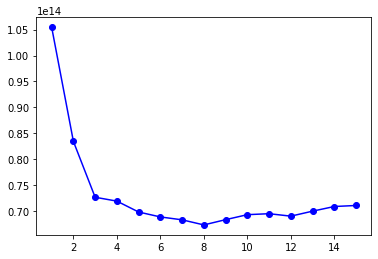

In [208]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 16)
plt.plot(kvals, valid_rss,'bo-')

***QUIZ QUESTION ***

What is the RSS on the TEST data using the value of k found above?  To be clear, sum over all houses in the TEST set.

In [211]:
 knn_validation(8,features_train,output_train,features_test,output_test)

[189300603178121.0,
 162969655347954.25,
 149008586983832.44,
 137914467769569.0,
 132270467766797.36,
 132736445589544.89,
 131757081714412.03,
 133118823551516.81]

In [212]:
 ##133118823551516.81

In [219]:
"{:.1E}".format((133118823551516.81))

'1.3E+14'